In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

biocon = pd.read_csv('datasets/bioCON_plant_diversity.txt', delimiter='\t')
parks = pd.read_csv('datasets/national_parks_biodiversity_parks.csv')
species = pd.read_csv('datasets/national_parks_biodiversity_species.csv', low_memory = False)
pollinator1 = pd.read_csv('datasets/plant_pollinator_diversity_set1.csv')
pollinator2 = pd.read_csv('datasets/plant_pollinator_diversity_set2.csv')
#lupinus = pd.read_csv('datasets/lupinus.txt', delimiter='\t')

In [2]:
biocon.shape

(5633, 16)

In [20]:
type(biocon['Carbon(%)'][0])
biocon['Carbon(%)'].replace('', np.nan, inplace=True)
biocon.dropna(subset=['Carbon(%)'], inplace=True)
biocon['Carbon(%)']=biocon['Carbon(%)'].astype(float)

In [19]:
biocon.head()

,Year,Plot,Ring,CO2 Treatment,Nitrogen Treatment,CountOfSpecies,CountOfGroup,Experiment,monospecies,Monogroup,Water Treatment,Temp Treatment,Depth,Carbon(%),Nitrogen(%),C/N Ratio
0,2002,1,1,Cenrich,Namb,4,2,M,,,,,0-10,0.618,0.074,8.351351351
1,2002,1,1,Cenrich,Namb,4,2,M,,,,,10-20,0.515,0.057,9.035087719
2,2002,1,1,Cenrich,Namb,4,2,M,,,,,20-40,0.142,0.023,6.173913043
3,2002,1,1,Cenrich,Namb,4,2,M,,,,,40-60,0.132,0.016,8.25
4,2002,2,1,Cenrich,Namb,1,1,M,Bouteloua gracilis,C-4,,,0-10,0.550,0.07,7.857142857


In [27]:
biocon['Year'].value_counts()

2007    1484
2012    1483
2002    1482
2016    1181
Name: Year, dtype: int64

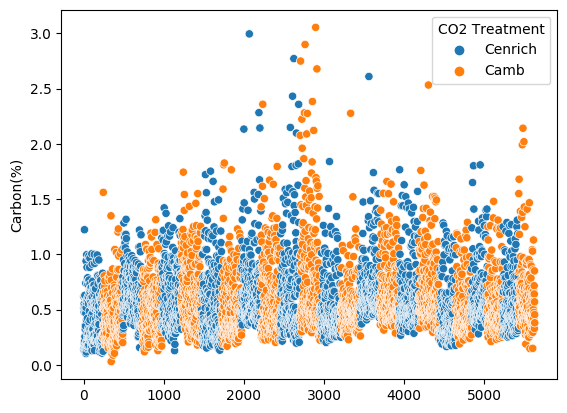

In [31]:
x_axis=[*range(1,5631,1)]
sns.scatterplot(x=x_axis, y='Carbon(%)', data=biocon, hue='CO2 Treatment')

In [25]:
biocon.groupby(['CO2 Treatment', 'Depth', 'Year', 'CountOfSpecies']).mean()['Carbon(%)'].to_frame()

Carbon(%)
CO2 Treatment Depth Year CountOfSpecies           
Camb          0-10  2002 0                0.649983
                         1                0.594678
                         4                0.711398
                         9                0.693663
                         16               0.769587
...                                            ...
Cenrich       40-60 2012 16               0.443375
                    2016 1                0.333859
                         4                0.363167
                         9                0.380767
                         16               0.359875

[152 rows x 1 columns]

In [8]:
biocon['Plot'].value_counts()

1      16
213    16
238    16
237    16
236    16
       ..
85     12
88     12
89     12
93     12
371    12
Name: Plot, Length: 371, dtype: int64

# Info om datasettet

In [2]:
pollinator1.head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,...,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,QC_NOTES
0,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ACHIMILL,Achillea millefolium,EPICPUNC,Epicauta puncticollis,predaceous beetle,NaN,1,NaN
1,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,1.0,ACHIMILL,Achillea millefolium,EVYLS5M,Evylaeus sp 5M,halictine bee,NaN,1,NaN
2,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,1,NaN
3,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,2,NaN
4,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,TRICORNA,Trichodes ornatus,bee-parasitic beetle,NaN,1,NaN


In [3]:
pollinator1.shape

(74131, 26)

In [4]:
pollinator1.columns.values

array(['DBCODE', 'ENTITY', 'COMPLEX', 'MEADOW', 'PLOT_ID', 'YEAR',
       'SAMPLEDATE', 'WATCH', 'OBSERVER', 'PLOT', 'START_TIME',
       'END_TIME', 'MINUTE', 'CLOUDS', 'WIND', 'TEMP', 'PPI_STATUS',
       'NO_INT', 'PLTSP_CODE', 'PLTSP_NAME', 'VISSP_CODE', 'VISSP_NAME',
       'VISSP_TYPE', 'REF_NO', 'VISSP_NO', 'QC_NOTES'], dtype=object)

# Nye datasett for hvert år

- Vet at hver rad representerer en interakjson. Kan det hende at temperatur etc. påvirker antall interaksjoner ila et år?
- Vet at 2014-2016 har noen rader med PPI_STATUS = 0: "No plant-pollinator interactions for interaction survey watch minutes"
- Antar at dette betyr at det ikke var noen interaksjon på denne raden
- Hvorfor har de med raden?
- Må også ta hensyn til NO_INT

In [5]:
pol_2011 = pollinator1[(pollinator1['YEAR']==2011) & (pollinator1['PPI_STATUS']==1)]
pol_2011['NO_INT'].sum()

38222.0

In [6]:
pol_2011['TEMP'].unique()

array([nan])

In [7]:
pol_2012 = pollinator1[(pollinator1['YEAR']==2012) & (pollinator1['PPI_STATUS']==1)]
pol_2012['NO_INT'].sum()

15056.0

In [8]:
pol_2012['TEMP'].unique()

array([nan])

In [9]:
pol_2013 = pollinator1[(pollinator1['YEAR']==2013) & (pollinator1['PPI_STATUS']==1)]
pol_2013['NO_INT'].sum()

24554.0

In [10]:
pol_2013['TEMP'].mean()

26.14676258992806

In [11]:
pol_2014 = pollinator1[(pollinator1['YEAR']==2014) & (pollinator1['PPI_STATUS']==1)]
pol_2014['NO_INT'].sum()

23580.0

In [12]:
pol_2014['TEMP'].mean()

26.95887230514096

In [13]:
pol_2015 = pollinator1[(pollinator1['YEAR']==2015) & (pollinator1['PPI_STATUS']==1)]
pol_2015['NO_INT'].sum()

11149.0

In [14]:
pol_2015['TEMP'].mean()

24.966934341048653

In [15]:
pol_2016 = pollinator1[(pollinator1['YEAR']==2016) & (pollinator1['PPI_STATUS']==1)]
pol_2016['NO_INT'].sum()

13134.0

In [16]:
pol_2016['TEMP'].mean()

23.85668413047152

In [17]:
pol_2017 = pollinator1[(pollinator1['YEAR']==2017) & (pollinator1['PPI_STATUS']==1)]
pol_2017['NO_INT'].sum()

26931.0

In [18]:
pol_2017['TEMP'].mean()

23.276315789473685

In [19]:
pol_2018 = pollinator1[(pollinator1['YEAR']==2018) & (pollinator1['PPI_STATUS']==1)]
pol_2018['NO_INT'].sum()

44507.0

In [20]:
pol_2018['TEMP'].mean()

21.591374089532696

## Gjennomsnittstemperaturer og antall målinger
- 2011 - ikke målt temp - 38222
- 2012 - ikke målt temp - 15056
- 2013 - 26,14 - 24554
- 2014 - 26,51 - 23580
- 2015 - 23,71 - 11149
- 2016 - 23,44 - 13134
- 2017 - 23,27 - 24931
- 2018 - 21,59 - 44507

Text(0.5, 1.0, 'Number of interactions and mean temperature p/ year')

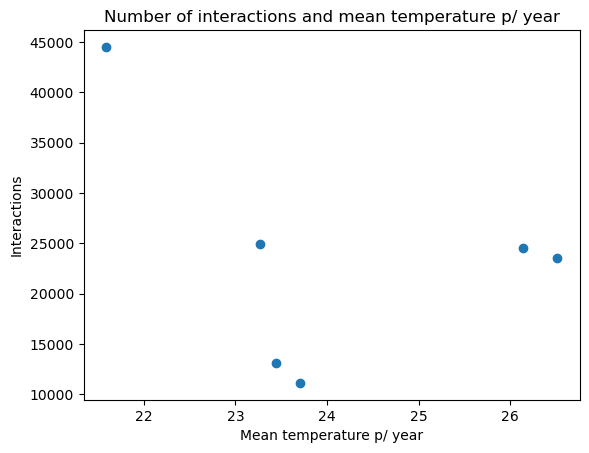

In [21]:
interactions = [24554, 23580, 11149, 13134, 24931, 44507]
temp = [26.14, 26.51, 23.71, 23.44, 23.27, 21.59]
plt.scatter(temp, interactions)
plt.xlabel('Mean temperature p/ year')
plt.ylabel('Interactions')
plt.title('Number of interactions and mean temperature p/ year')

### Resultater
- Ser en sammenheng i nedgang i interaksjoner ved økende temperaturer
- Noen grunn til at det ene året har veldig få interaksjoner (2015)?

In [22]:
poll = pollinator1[(pollinator1['PPI_STATUS']==1) & (pollinator1['PPI_STATUS']==1)]
poll['TEMP'].value_counts()

24.0    3396
23.0    3023
21.0    2871
22.0    2802
20.0    2649
26.0    2515
19.0    2233
28.0    2176
25.0    2128
27.0    2069
29.0    1917
18.0    1294
17.0     933
30.0     920
16.0     896
31.0     656
34.0     536
32.0     521
12.0     324
15.0     308
14.0     303
33.0     255
36.0     243
13.0     242
35.0     193
10.0      29
11.0      23
38.0      23
37.0      18
39.0       9
Name: TEMP, dtype: int64

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

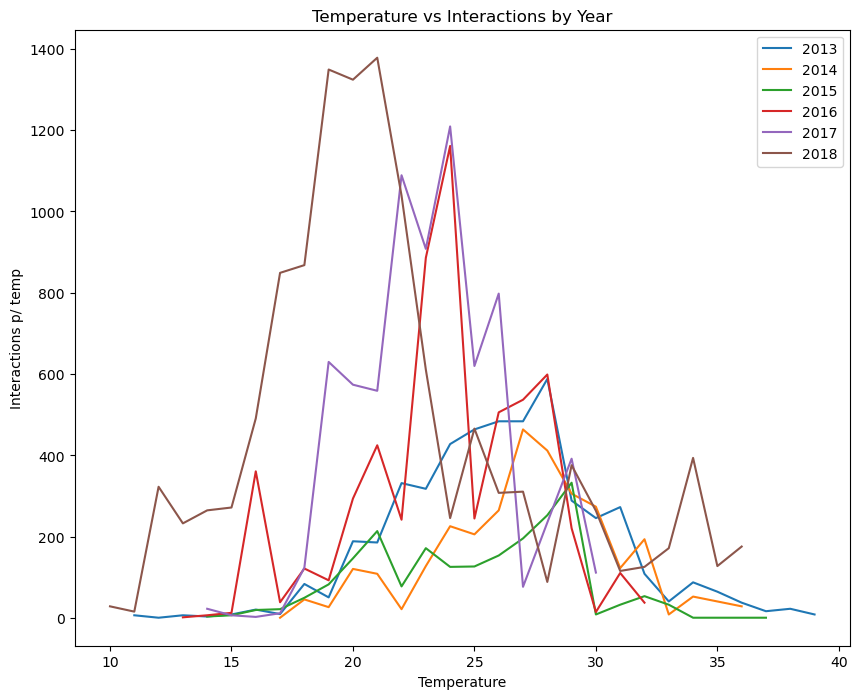

In [23]:
plt.figure(figsize=(10,8))

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for year in years:
    df = pollinator1[(pollinator1['YEAR']==year) & (pollinator1['PPI_STATUS']==1)]
    
    # må finne antall interakjsoner per temp
    temp_interactions = df['TEMP'].value_counts()
    sns.lineplot(temp_interactions.index, temp_interactions.values, label = year)


plt.xlabel('Temperature')
plt.ylabel('Interactions p/ temp')
plt.title('Temperature vs Interactions by Year')
plt.legend();

## Antall dyre- og plantearter per år
- Finnes det en måte man kan representere antall arter fra hvert år

In [24]:
plants=pollinator1['PLTSP_CODE'].value_counts().to_frame()
plants = plants[plants['PLTSP_CODE']>1000]
p = plants.index
p

Index(['GILICAPI', 'ERIOLANA', 'LIGUGRAY', 'ERIGFOLI', 'ERIOCOMP', 'ACHIMILL',
       'ORTHIMBR', 'DELPNUTT', 'CALOSUBA', 'ANGEARGU', 'CIRSCALL', 'LUPILAXI',
       'HYPEPERF', 'SEDUOREG', 'POTEGRAC', 'PENSPROC'],
      dtype='object')

In [25]:
df = pollinator1[(pollinator1['YEAR']==2014) & (pollinator1['PLTSP_CODE'].isin(p))]
df.shape

(3773, 26)

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

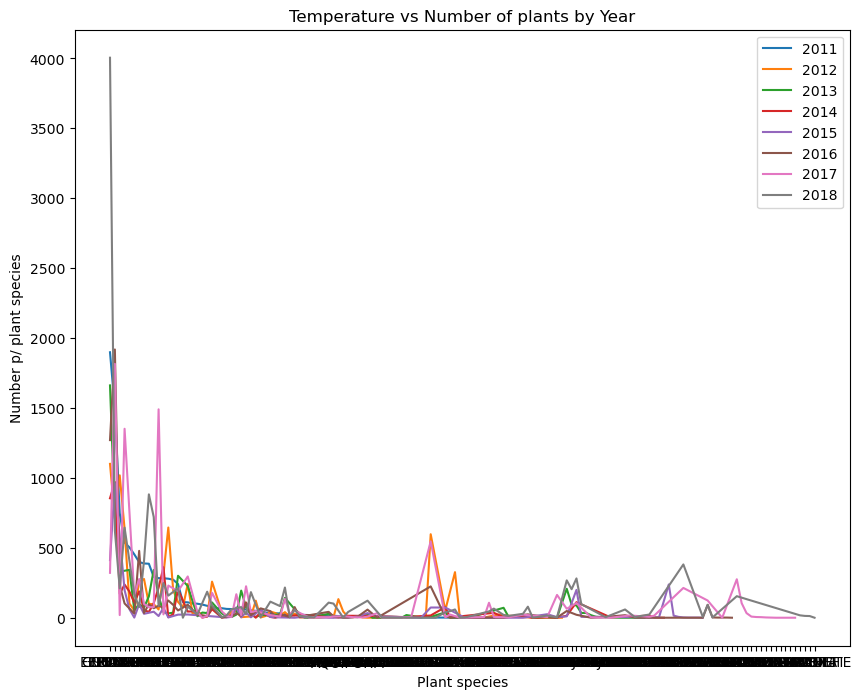

In [26]:
plt.figure(figsize=(10,8))

years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for year in years:
    df = pollinator1[pollinator1['YEAR']==year]
    plants=df['PLTSP_CODE'].value_counts()
    sns.lineplot(plants.index, plants.values, label = year)


plt.xlabel('Plant species')
plt.ylabel('Number p/ plant species')
plt.title('Temperature vs Number of plants by Year')
plt.legend();

### Resultater
- Ingen vedlig tydelige resultater, men ser at det er en viss sammenheng mellom hvilke planter som befinner seg der hvert år
- Noen planter er der veldig mye mer ett år, hvorfor?

In [35]:
pollinator1[pollinator1['YEAR']==2018]['VISSP_NAME'].value_counts()

Apis mellifera                2834
Bombus mixtus                 2673
Bombus bifarius               2583
Bombus vosnesenskii           1035
Syrphidae                      297
                              ... 
Evylaeus sp 3                    1
Acridid sp 1                     1
Frankliniella occidentalis       1
Muscoid genus 4                  1
Hemiptera                        1
Name: VISSP_NAME, Length: 161, dtype: int64